In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from itertools import cycle
from matplotlib.patches import Patch


In [61]:
global bar
def textured_box(bar):
    # Define some hatches
    hatches = cycle(['///','x', '*', 'o','-', '+', '\\'])

    # Loop over the bars
    for i,thisbar in enumerate(bar.artists):
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

In [97]:
global bar
global num_metrics
hatches = cycle(['///','x', '*', 'o','-', '+', '\\'])
def textured_box(bar,num_metrics):
    
    for i, patch in enumerate(bar.artists):
        # Blue bars first, then green bars
        if i % num_metrics == 0:
            hatch = next(hatches)
        patch.set_hatch(hatch)

In [70]:
global bar
def textured_box(bar):
    #Loop over the bars
    hatches = ["/", "o", "*", "\\"]
    for hatch, patch in zip(hatches, ml_trad_boxplot.artists):
        patch.set_hatch(hatch)
 

In [ ]:
ax.patches[5].set_hatch('x')
from matplotlib.patches import Patch


## Clone density distribution

In [8]:
dl_type1 = pd.read_csv('data/clone_data/dl_type1.csv')
dl_type2 = pd.read_csv('data/clone_data/dl_type2.csv')
dl_type3 = pd.read_csv('data/clone_data/dl_type3.csv')

In [9]:
dl_type1['clone_type']='Type 1'
dl_type2['clone_type']='Type 2'
dl_type3['clone_type']='Type 3'

In [10]:
dl_all_clones = pd.concat([dl_type1,dl_type2])
dl_all_clones = pd.concat([dl_all_clones,dl_type3])

In [11]:
trad_type1 = pd.read_csv('data/clone_data/trad_type1.csv')
trad_type2 = pd.read_csv('data/clone_data/trad_type2.csv')
trad_type3 = pd.read_csv('data/clone_data/trad_type3.csv')

In [12]:
trad_type1['clone_type']='Type 1'
trad_type2['clone_type']='Type 2'
trad_type3['clone_type']='Type 3'

In [13]:
trad_all_clones = pd.concat([trad_type1,trad_type2])
trad_all_clones = pd.concat([trad_all_clones,trad_type3])

In [14]:
dl_all_clones['project_type']='Deep Learning'
trad_all_clones['project_type']='Traditional'

In [15]:
repos_size = pd.read_csv("data/slocs_data.csv")

In [16]:
all_clones = pd.concat([dl_all_clones,trad_all_clones])

In [17]:
def get_locc(row):
    startline=row['startline']
    endline = row['endline']
    return endline - startline +1

In [18]:
all_clones['locc']=all_clones.apply(get_locc, axis=1)

In [19]:
clones_by_type = all_clones.groupby(['repoName','granularity','clone_type','project_type']).agg({'locc':'sum'}).reset_index()

In [20]:
repos_clones_size = pd.merge(clones_by_type,repos_size,how='left', on=['repoName'])

In [21]:
repos_clones_size = repos_clones_size[repos_clones_size['total_sloc'] !=0]

In [22]:
repos_clones_size['LOCC / total SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

In [23]:
repos_clones_size['LOCC_total_SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

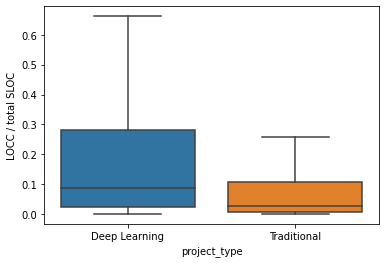

In [24]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size, showfliers=False)
#ml_trad_boxplot.set_yscale("log")

In [25]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [26]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=25987.0, pvalue=5.146640278957621e-16)

In [27]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=25987.0, pvalue=1.0293280557915242e-15)

In [28]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=58498.0, pvalue=1.0293280557915242e-15)

In [29]:
def runs(lst):
    "Iterator, chunks repeated values"
    for j,two in enumerate(lst):
        if j == 0:
            one,i = two,0
        if one!=two:
            yield j - i,one
            i = j
        one=two
    yield j - i + 1,two
def cliffsDelta(lst1,lst2): 
    "Returns true if there are more than 'dull' differences"
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats,x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] <  x: 
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x: 
            j += 1
        less += (n - j)*repeats
    d= (more - less) / (m*n) 
    return abs(d)

In [30]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.7479079126472155

## By clone type

Text(0.5, 1.0, 'Clone occurrences by project type and by clone type')

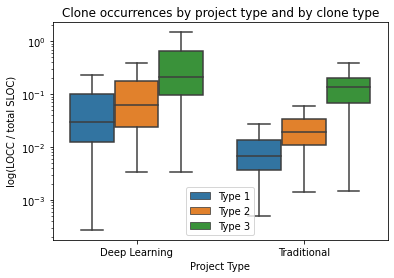

In [31]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('Clone occurrences by project type and by clone type')

In [32]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [33]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1627.0, pvalue=3.2953094551306856e-12)

In [34]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1812.0, pvalue=9.38365512744147e-10)

In [35]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

MannwhitneyuResult(statistic=4186.0, pvalue=2.7205326923789545e-06)

In [36]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.7832254853160776

In [37]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.5262745098039215

In [38]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.6464646464646465

In [39]:
def update_granularity(row):
    granularity=row['granularity']
    if 'block' in granularity:
        return 'Block'
    elif 'function' in granularity:
        return 'Function'

In [40]:
repos_clones_size['granularity']=repos_clones_size.apply(update_granularity, axis=1)

In [41]:
repos_clones_size_block = repos_clones_size[repos_clones_size['granularity']=='Block']
repos_clones_size_fct = repos_clones_size[repos_clones_size['granularity']=='Function']

In [42]:
traditional_block = repos_clones_size_block[repos_clones_size_block['project_type']=='Traditional']
dl_block = repos_clones_size_block[repos_clones_size_block['project_type']=='Deep Learning']
traditional_fct = repos_clones_size_fct[repos_clones_size_fct['project_type']=='Traditional']
dl_fct = repos_clones_size_fct[repos_clones_size_fct['project_type']=='Deep Learning']

In [43]:
trad_type1_fct = traditional_fct[traditional_fct['clone_type']=='Type 1']
trad_type2_fct = traditional_fct[traditional_fct['clone_type']=='Type 2']
trad_type3_fct = traditional_fct[traditional_fct['clone_type']=='Type 3']

dl_type1_fct =dl_fct[dl_fct['clone_type']=='Type 1']
dl_type2_fct = dl_fct[dl_fct['clone_type']=='Type 2']
dl_type3_fct = dl_fct[dl_fct['clone_type']=='Type 3']

In [44]:
trad_type1_block = traditional_block[traditional_block['clone_type']=='Type 1']
trad_type2_block = traditional_block[traditional_block['clone_type']=='Type 2']
trad_type3_block = traditional_block[traditional_block['clone_type']=='Type 3']

dl_type1_block = dl_block[dl_block['clone_type']=='Type 1']
dl_type2_block = dl_block[dl_block['clone_type']=='Type 2']
dl_type3_block = dl_block[dl_block['clone_type']=='Type 3']

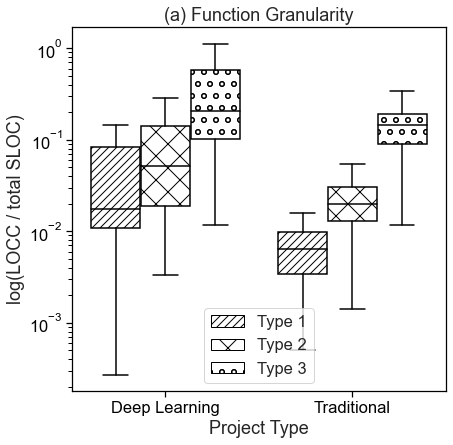

In [98]:

sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct,
                 showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("dl_trad_clone_type_fct.pdf")

### function

In [45]:
stats.mannwhitneyu(trad_type1_fct.LOCC_total_SLOC,dl_type1_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=344.0, pvalue=3.1256716143260985e-06)

In [46]:
cliffsDelta(trad_type1_fct.LOCC_total_SLOC,dl_type1_fct.LOCC_total_SLOC)

0.5845410628019324

In [47]:
stats.mannwhitneyu(trad_type2_fct.LOCC_total_SLOC,dl_type2_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=670.0, pvalue=3.382972751334123e-05)

In [48]:
cliffsDelta(trad_type2_fct.LOCC_total_SLOC,dl_type2_fct.LOCC_total_SLOC)

0.46314102564102566

In [49]:
stats.mannwhitneyu(trad_type3_fct.LOCC_total_SLOC,dl_type3_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1085.0, pvalue=0.001766510851886626)

In [50]:
cliffsDelta(trad_type3_fct.LOCC_total_SLOC,dl_type3_fct.LOCC_total_SLOC)

0.31889516635279347

### blocks

In [51]:
stats.mannwhitneyu(trad_type1_block.LOCC_total_SLOC,dl_type1_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=458.0, pvalue=7.60737673214229e-08)

In [52]:
cliffsDelta(trad_type1_block.LOCC_total_SLOC,dl_type1_block.LOCC_total_SLOC)

0.617056856187291

In [53]:
stats.mannwhitneyu(trad_type2_block.LOCC_total_SLOC,dl_type2_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=282.0, pvalue=4.172758725088073e-06)

In [54]:
cliffsDelta(trad_type2_block.LOCC_total_SLOC,dl_type2_block.LOCC_total_SLOC)

0.5988620199146515

In [55]:
stats.mannwhitneyu(trad_type3_block.LOCC_total_SLOC,dl_type3_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=1016.0, pvalue=0.0002872876666620591)

In [56]:
cliffsDelta(trad_type3_block.LOCC_total_SLOC,dl_type3_block.LOCC_total_SLOC)

0.37438423645320196

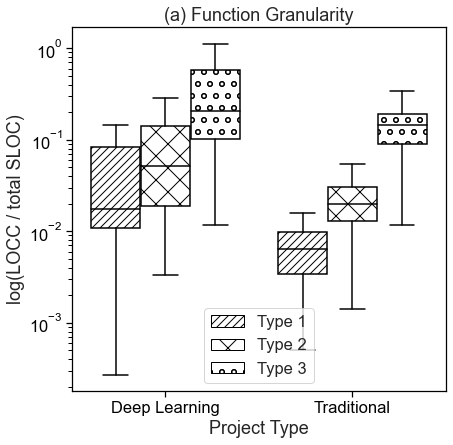

In [112]:
sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("dl_trad_clone_type_fct.pdf", bbox_inches='tight')

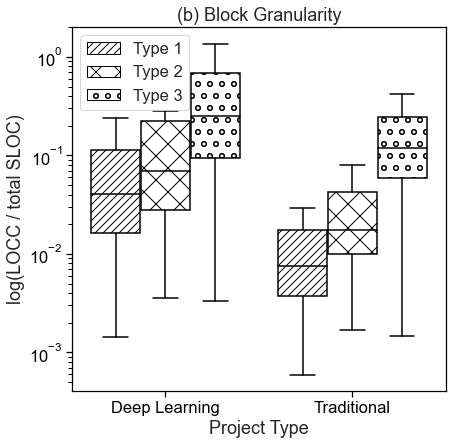

In [111]:
sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("dl_trad_clone_type_block.pdf", bbox_inches='tight')

Text(0.5, 1.0, '(a) Block Granularity')

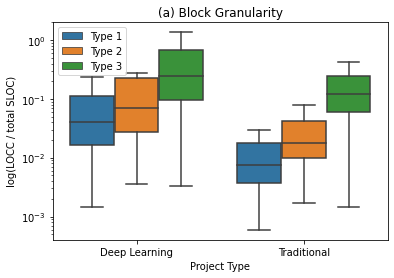

In [57]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(a) Block Granularity')

TypeError: 'itertools.cycle' object is not subscriptable

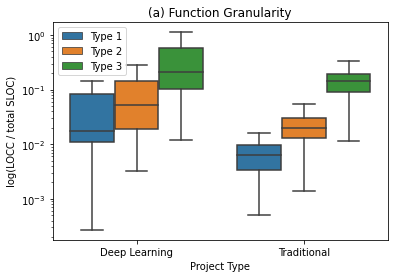

In [62]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
ml_trad_boxplot.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
plt.legend(loc='best')
plt.title('(a) Function Granularity')
textured_box(ml_trad_boxplot)
plt.show()

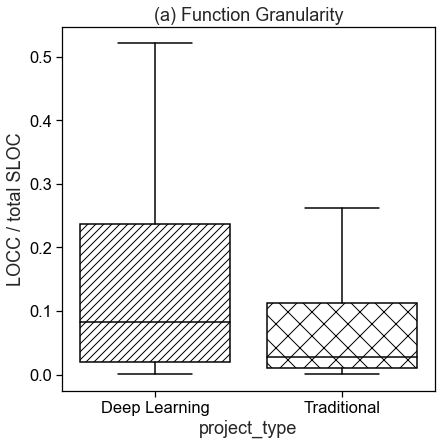

In [107]:

sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
#ax.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

#type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
#type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
#type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
#legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
#frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("dl_trad_fct.pdf")

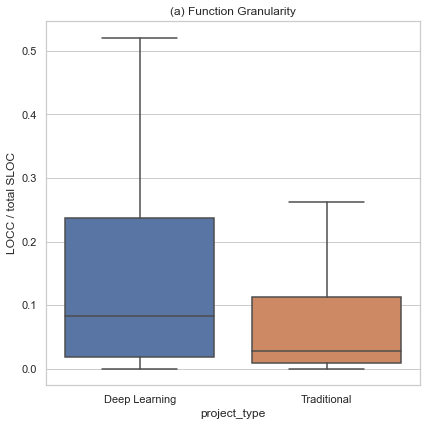

In [103]:
sns.set(style="whitegrid", color_codes=True)

ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_fct, showfliers=False)
#ml_trad_boxplot.set_yscale("log")

plt.title('(a) Function Granularity')

plt.show()

## ml_trad_boxplot.patches

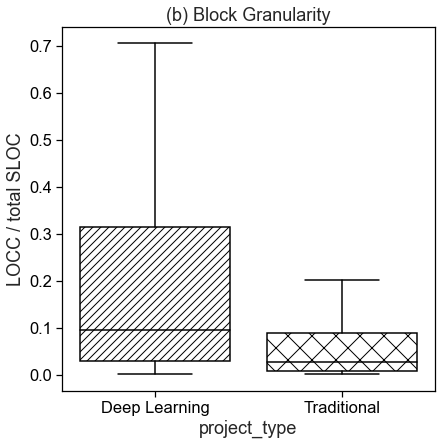

In [106]:

sns.set(rc={'figure.figsize':(6.7,6.7)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
#ax.set(xlabel='Project Type', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

#type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
#type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
#type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
#legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
#frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("dl_trad_block.pdf")

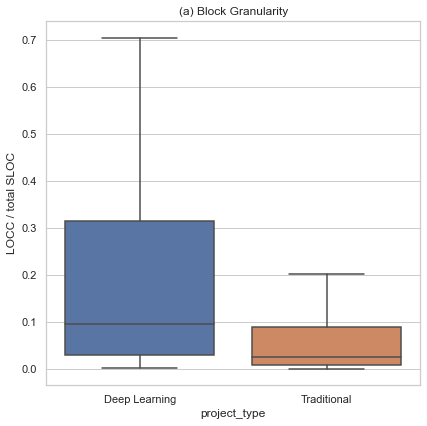

In [104]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_block, showfliers=False)
#ml_trad_boxplot.set_yscale("log")
plt.title('(a) Block Granularity')

plt.show()

In [65]:
stats.mannwhitneyu(traditional_block.LOCC_total_SLOC,dl_block.LOCC_total_SLOC)

MannwhitneyuResult(statistic=5936.0, pvalue=3.0068434096511597e-10)

In [66]:
cliffsDelta(traditional_block.LOCC_total_SLOC,dl_block.LOCC_total_SLOC)

0.5269298075053471

In [67]:
stats.mannwhitneyu(traditional_fct.LOCC_total_SLOC,dl_fct.LOCC_total_SLOC)

MannwhitneyuResult(statistic=7111.0, pvalue=1.7841482512278643e-07)

In [68]:
cliffsDelta(traditional_fct.LOCC_total_SLOC,dl_fct.LOCC_total_SLOC)

0.80374780762485